In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.configreader as configreader

#main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/'
subdir = 'patterning'
mu = (np.sin(np.pi/3.))**2 / (2*np.pi/3. - np.sin(2*np.pi/3.))

In [2]:
def event_counter(filename) :
    events = open(filename, 'r').read()
    Nmerge = events.count('merge')
    Ndis = events.count('disappears')
    return Ndis, Nmerge

def print_outcomes(events, tablename='') :
    if len(tablename) > 0 :
        s = '='*5 + ' ' + tablename + ' ' + '='*5
        print('='*len(s))
        print(s)
    else :
        s = '='*30
        print(s)
    print('Coarsening events  : ', events[0])
    print('Coalescence events : ', events[1])
    print('-'*len(s))
    print('Total              : ', events[0]+events[1])
    print('='*len(s))
    print('')

# Hydraulic

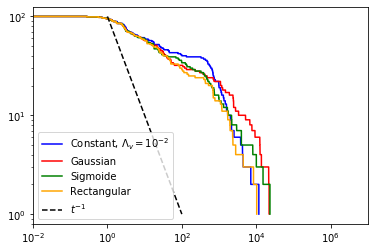

In [3]:
subsubdir = 'hydraulic'
Nt_constant = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0000', 'sim_nlum.dat'))
Nt_gauss = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0001', 'sim_nlum.dat'))
Nt_sig = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0002', 'sim_nlum.dat'))
Nt_rec = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0003', 'sim_nlum.dat'))

plt.xscale('log')
plt.yscale('log')
plt.plot(Nt_constant[:, 0], Nt_constant[:, 1], color = 'b', label = r'Constant, $\Lambda_v = 10^{-2}$')
plt.plot(Nt_gauss[:, 0], Nt_gauss[:, 1], color = 'r', label = r'Gaussian')
plt.plot(Nt_sig[:, 0], Nt_sig[:, 1], color = 'g', label = r'Sigmoide')
plt.plot(Nt_rec[:, 0], Nt_rec[:, 1], color = 'orange', label = r'Rectangular')

tp = np.logspace(0, 2, 101)
kp, ap = 100., -1.
plt.plot(tp, kp*tp**ap, label = r'$t^{-1}$', color='k', linestyle = '--')

plt.xlim(1e-2, 1e7)

plt.legend()
plt.show()


# Hydroosmotic

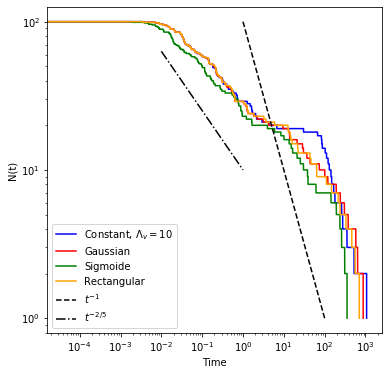

In [4]:
subsubdir = 'hydroosmotic'
Nt_constant = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0000', 'sim_nlum.dat'))
Nt_gauss = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0001', 'sim_nlum.dat'))
Nt_sig = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0002', 'sim_nlum.dat'))
Nt_rec = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run0003', 'sim_nlum.dat'))

plt.figure(figsize=(6, 6))
plt.xscale('log')
plt.yscale('log')
plt.plot(Nt_constant[:, 0], Nt_constant[:, 1], color = 'b', label = r'Constant, $\Lambda_v = 10$')
plt.plot(Nt_gauss[:, 0], Nt_gauss[:, 1], color = 'r', label = r'Gaussian')
plt.plot(Nt_sig[:, 0], Nt_sig[:, 1], color = 'g', label = r'Sigmoide')
plt.plot(Nt_rec[:, 0], Nt_rec[:, 1], color = 'orange', label = r'Rectangular')

tp = np.logspace(0, 2, 101)
kp, ap = 100., -1.
plt.plot(tp, kp*tp**ap, label = r'$t^{-1}$', color='k', linestyle = '--')

tc = np.logspace(-2, 0, 101)
kc, ac = 10., -2./5.
plt.plot(tc, kc*tc**ac, label = r'$t^{-2/5}$', color='k', linestyle = '-.')

#plt.xlim(1e-2, 1e7)
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.legend()
plt.show()



In [5]:
constant_events = event_counter(os.path.join(main_dir, subdir, subsubdir, 'run0000', 'events.log'))
gaussian_events = event_counter(os.path.join(main_dir, subdir, subsubdir, 'run0001', 'events.log'))
sigmoide_events = event_counter(os.path.join(main_dir, subdir, subsubdir, 'run0002', 'events.log'))
rectangular_events = event_counter(os.path.join(main_dir, subdir, subsubdir, 'run0003', 'events.log'))

print_outcomes(constant_events, tablename='Constant pattern')
print_outcomes(gaussian_events, tablename='Gaussian pattern')
print_outcomes(sigmoide_events, tablename='Sigmoide pattern')
print_outcomes(rectangular_events, tablename='Rectangular pattern')

===== Constant pattern =====
Coarsening events  :  88
Coalescence events :  11
----------------------------
Total              :  99

===== Gaussian pattern =====
Coarsening events  :  98
Coalescence events :  1
----------------------------
Total              :  99

===== Sigmoide pattern =====
Coarsening events  :  92
Coalescence events :  6
----------------------------
Total              :  98

===== Rectangular pattern =====
Coarsening events  :  95
Coalescence events :  4
-------------------------------
Total              :  99



# Patterns
We assume the chain is contained within $x \in [0, L_{tot}]$ and has a given pumping function imposed, $f(x)$. We want to compute the total pumping over the chain, ie calculate the integral of the functions over interval $[x_{\min}, x_{\max}]$, such that
$$I(x_\min, x_\max ; \vec{\theta}) = \int_{x_\min}^{x_\max} dx f(x ; \vec{\theta}) $$

where $\vec{\theta}$ is a set of parameters of the function.

## Constant
The constant function is given by
$$\forall x \in [x_{\min}, x_{\max}], f(x;cte) = cte$$
Thus, integrating, we simply have
$$\boxed{I(x_\min, x_\max ; cte) = cte.(x_\max - x_\min)}$$

## Gaussian
The gaussian is parametrized with three parameters :
$$\forall x \in [x_{\min}, x_{\max}], f(x;A, \mu, \sigma) = A.\exp \left[ - \frac{(x-\mu)^2}{\sigma^2} \right]$$
with $A$ the amplitude, $\mu$ the average and $\sigma$ the standard deviation. The integral is thus
$$\boxed{I_{G}(x_\min, x_\max ; A, \mu, \sigma) = A.\sigma \left[ \rm{erf}(\sigma.x_\max) - \rm{erf} (\sigma.x_\min)\right]}$$
where $\rm{erf}$ is the error function, defined as
$$\rm{erf}(x) = \int_0^x e^{-t^2}dt $$

## Sigmoide
The sigmoide is parametrized as a logistic function, with four parameters :
$$\forall x \in [x_{\min}, x_{\max}], f(x;f_\min, f_\max, s, \mu) = f_\min + \frac{f_\max - f_\min}{1+e^{-s.(x-\mu)}}$$
with $\mu$ the inflexion point position on the x-axis, $s$ the slope of the curve, $f_\min$ (resp. $f_\max$) the minimum (resp. maximum) of the sigmoide. Its integral is given by
$$\boxed{I_{S}(x_\min, x_\max ; f_\min, f_\max, \mu, s) = f_\min.(x_\max-x_\min) + \frac{f_\max - f_\min}{s}.\left[ \log\left(\frac{y_2+1}{y_1+1}\right) - \log\left(\frac{y_2}{y_1}\right)  \right]}$$
where $y_{1, 2} = e^{-s(x_{1, 2} - \mu)}$.

## Rectangular
The rectangular function is parametrized with four parameters :
$$\forall x \in [x_{\min}, x_{\max}], f(x;f_\min, f_\max, a, b) = \begin{cases}f_\max &, a \leq x \leq b\\
f_\min &, else\end{cases}$$a
assuming $x_\min \leq a \leq b \leq x_max$. Its integral is given by
$$\boxed{I_{R}(x_\min, x_\max ; f_\min, f_\max, \mu, s) = f_\min.(x_\max-x_\min) + (b-a).(f_\max-f_\min)}$$

# Parameters
We will denote $x_\max - x_\min = \Delta x$
## Gaussian
We assume the parameters $\mu$ and $\sigma$ are given. To have $I = I_G$, we need $A$ to be

$$ A = \frac{cte.\Delta x}{\sigma.\left[ \rm{erf}(\sigma x_\max) - \rm{erf}(\sigma x_\min)\right]}$$

## Rectangular
We assume the parameters $f_\min$ and $f_\max$ are given. We denote $b-a = w$. To have $I_R = I$, we need $w$ to be

$$w = \frac{\Delta x}{f_\max - f_\min} \left[cte - f_\min \right]$$ 

## Sigmoide
We assume the parameters $s$ and $\mu$ are given. 
- We assume $f_\max$ is given. Then, $f_\min$ must be
$$f_\min = f_\max + s.\Delta x \frac{(f_\max-cte)}{\log\left[\frac{y_2+1}{y_1+1}\right]} $$
- We assume $f_\min$ is given. Then $f_\max$ must be
$$f_\max = \frac{s.cte.\Delta x + f_\min \log\left[ \frac{1+y_2}{1+y_1}\right]}{s \Delta x + \log \left[\frac{1+y_2}{1+y_1}\right]}$$

In [6]:
def A_gaussian(cte, xmin,  xmax, sigma) :
    return cte*(xmax-xmin) / (sigma* (erf(sigma*xmax) - erf(sigma*xmin)))

def w_rectangular(cte, xmin,  xmax, fmin, fmax) :
    return (xmax - xmin) * (cte - fmin) / (fmax - fmin)

def fmin_sigmoide(cte, xmin, xmax, s, mu, fmax) :
    y1 = np.exp(-s*(xmin-mu))
    y2 = np.exp(-s*(xmax-mu))
    return fmax + s*(xmax-xmin)*(fmax - cte) / np.log((y2+1)/(y1+1))

def fmax_sigmoide(cte, xmin, xmax, s, mu, fmin) :
    y1 = np.exp(-s*(xmin-mu))
    y2 = np.exp(-s*(xmax-mu))
    return (s*cte*(xmax-xmin) + fmin*np.log((1+y2)/(1+y1)) ) / (s*(xmax-xmin) + np.log((1+y2)/(1+y1)))

In [7]:
N = 100
bridges_borders = 200
Lt = 2*bridges_borders + 1*N + 10*(N-1)

cte=1.
xmin, xmax = bridges_borders/Lt, (Lt-bridges_borders)/Lt
print(A_gaussian(cte=cte, xmin=xmin, xmax=xmax, sigma=0.05 ))
print(w_rectangular(cte=cte, xmin=xmin, xmax=xmax, fmin=0., fmax=10.)/(xmax-xmin))
print(fmin_sigmoide(cte=cte, xmin=xmin, xmax=xmax, s=50., mu=0.5, fmax=10.))
print(fmax_sigmoide(cte=cte, xmin=xmin, xmax=xmax, s=1., mu=0.5, fmin=0.))

354.75189435524345
0.09999999999999999
-8.0
1.9999999999999993


201.0
200.95796275177787
200.95529097100348
199.5075532646464


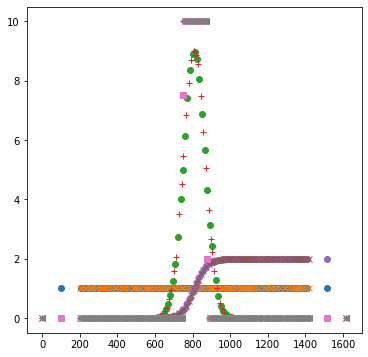

In [8]:
plt.figure(figsize=(6,6))

conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'run0000', 'config.conf'))
lum_0 = np.array([[ch.lumens_dict[k].pos, ch.lumens_dict[k].ca] for k in ch.lumens_dict.keys()])
posbr_0 = ch.__bridges_pos_list__()
br_0 = np.array([[posbr_0[b], ch.bridges_dict[b].ca] for b in ch.bridges_dict.keys()])

plt.plot(br_0[:, 0], br_0[:, 1], linewidth=0, marker='o')
plt.plot(lum_0[:, 0], lum_0[:, 1], linewidth=0, marker='x')

# == GAUSSIAN
conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'run0001', 'config.conf'))
lum_1 = np.array([[ch.lumens_dict[k].pos, ch.lumens_dict[k].ca] for k in ch.lumens_dict.keys()])
posbr_1 = ch.__bridges_pos_list__()
br_1 = np.array([[posbr_1[b], ch.bridges_dict[b].ca] for b in ch.bridges_dict.keys()])

plt.plot(br_1[:, 0], br_1[:, 1], linewidth=0, marker='o')
plt.plot(lum_1[:, 0], lum_1[:, 1], linewidth=0, marker='+')

# == SIGMOIDE
conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'run0002', 'config.conf'))
lum_2 = np.array([[ch.lumens_dict[k].pos, ch.lumens_dict[k].ca] for k in ch.lumens_dict.keys()])
posbr_2 = ch.__bridges_pos_list__()
br_2 = np.array([[posbr_0[b], ch.bridges_dict[b].ca] for b in ch.bridges_dict.keys()])

plt.plot(br_2[:, 0], br_2[:, 1], linewidth=0, marker='o')
plt.plot(lum_2[:, 0], lum_2[:, 1], linewidth=0, marker='x')

# == RECTANGULAR
conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'run0003', 'config.conf'))
lum_3 = np.array([[ch.lumens_dict[k].pos, ch.lumens_dict[k].ca] for k in ch.lumens_dict.keys()])
posbr_3 = ch.__bridges_pos_list__()
br_3 = np.array([[posbr_3[b], ch.bridges_dict[b].ca] for b in ch.bridges_dict.keys()])

plt.plot(br_3[:, 0], br_3[:, 1], linewidth=0, marker='s')
plt.plot(lum_3[:, 0], lum_3[:, 1], linewidth=0, marker='<')

print(np.sum(lum_0[:, 1])+np.sum(br_0[:, 1]))
print(np.sum(lum_1[:, 1])+np.sum(br_1[:, 1]))
print(np.sum(lum_2[:, 1])+np.sum(br_2[:, 1]))
print(np.sum(lum_3[:, 1])+np.sum(br_3[:, 1]))


Import successful !


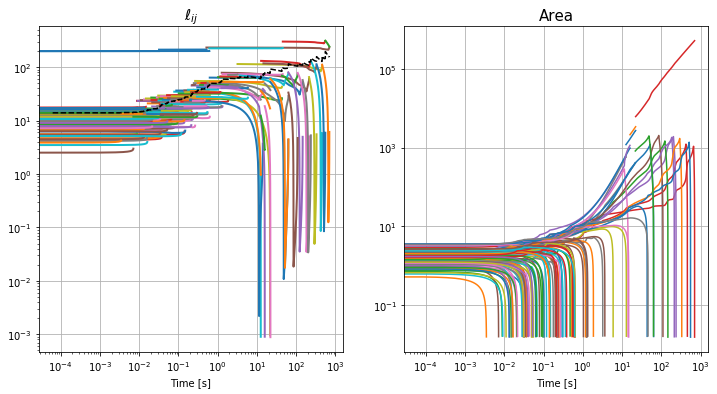

In [9]:
path = os.path.join(main_dir, subdir, subsubdir, 'run0003')

L, pos, ca_l = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=False)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

#savename = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')

show_area=0
savefig=False
x_log=1
y_log=1

tools.plot_evolution_hydraulic(L, ell, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(12, 6))




# End position

In [10]:
def import_endfile(folder, filename='end_chain.dat') :
    f = open(os.path.join(folder, filename), 'r')
    L = f.readlines()
    for line in L :
        splitted_line = line.split(' ')
        if line.startswith('Total length') :
            total_length = float(splitted_line[3])
            
        elif line.startswith('Lumen') and splitted_line[1] != '0' and splitted_line[1] != '-1' :
            #print(line)
            index = int(splitted_line[1])
            pos = float(splitted_line[5])
            length = float(splitted_line[8])
            nions = float(splitted_line[10])
            theta = np.pi/3.
            eps = 1e-3
            ca = float(splitted_line[14])
            lumen = lc.Osmotic_Lumen(index, pos, length, nions, theta, eps, ca)
    f.close()
    return lumen, total_length        
    
def calc_wpos(fold) :
    wpos = []
    #for i in range(nsim) :
    for elem in os.listdir(fold) :
        if elem.startswith('end_chain') :
            #print(fold)
            #folder = os.path.join(fold, elem)
            lumen, total_length = import_endfile(fold, filename=elem)

            wpos += [lumen.pos / total_length]
    return wpos

def calc_wlength(fold) :
    wlength = []
    for elem in os.listdir(fold) :
        if elem.startswith('run') :
            folder = os.path.join(fold, elem)
            lumen, total_length = import_endfile(folder)
        
            wlength += [lumen.length / total_length]
    return wlength

In [11]:
def import_pumping_params(folder) :
    params = []
    f = open(os.path.join(folder, 'config.conf.tpl'), 'r').readlines()
    for line in f :
        if line.startswith('param') :
            splitted_line = line.split(' ')
            
            params += [float(splitted_line[2])]
            
    return params

def gaussian(x, amp, mu, sigma, threshold) :
    return amp*np.exp(-(x-mu)**2/sigma**2) + threshold


def make_hist(array, bins) :
    weights=np.ones_like(array)/float(len(array))
    ypos, xpos = np.histogram(array, bins=bins, weights=weights)
    xpos = 0.5*(xpos[1:] + xpos[:-1])
    return xpos, ypos


In [16]:
folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'nopump')
wpos0 = calc_wpos(folder)
params_0 = import_pumping_params(os.path.join(folder))
print(len(wpos0))

10000


In [13]:

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin1_amp0.1')
wpos1 = calc_wpos(folder)
params_1 = import_pumping_params(os.path.join(folder))
print(len(wpos1))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin1_amp1')
wpos2 = calc_wpos(folder)
params_2 = import_pumping_params(os.path.join(folder))
print(len(wpos2))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin1_amp0.1_mu0.4_sigma0.03')
wpos3 = calc_wpos(folder)
params_3 = import_pumping_params(os.path.join(folder))
print(len(wpos3))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin1_amp1_mu0.4_sigma0.03')
wpos4 = calc_wpos(folder)
params_4 = import_pumping_params(os.path.join(folder))
print(len(wpos4))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0_amp1_mu0.4_sigma0.03')
wpos5 = calc_wpos(folder)
params_5 = import_pumping_params(os.path.join(folder))
print(len(wpos5))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0_amp1_mu0.4_sigma0.03')
wpos5 = calc_wpos(folder)
params_5 = import_pumping_params(os.path.join(folder))
print(len(wpos5))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'cste_pump1')
wpos6 = calc_wpos(folder)
params_6 = import_pumping_params(os.path.join(folder))
print(len(wpos6))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'cste_pump0.1')
wpos7 = calc_wpos(folder)
params_7 = import_pumping_params(os.path.join(folder))
print(len(wpos7))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'cste_pump0.5')
wpos8 = calc_wpos(folder)
params_8 = import_pumping_params(os.path.join(folder))
print(len(wpos8))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0.1_amp1_mu0.4_sigma0.03')
wpos9 = calc_wpos(folder)
params_9 = import_pumping_params(os.path.join(folder))
print(len(wpos9))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0.5_amp1_mu0.4_sigma0.03')
wpos10 = calc_wpos(folder)
params_10 = import_pumping_params(os.path.join(folder))
print(len(wpos10))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0.2_amp1_mu0.4_sigma0.03')
wpos11 = calc_wpos(folder)
params_11 = import_pumping_params(os.path.join(folder))
print(len(wpos11))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0.7_amp1_mu0.4_sigma0.03')
wpos12 = calc_wpos(folder)
params_12 = import_pumping_params(os.path.join(folder))
print(len(wpos12))


1000
5000
500
500
500
500
500
100
100
1000
1000
1000
1000


In [14]:
folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0.3_amp1_mu0.4_sigma0.03')
wpos13 = calc_wpos(folder)
params_13 = import_pumping_params(os.path.join(folder))
print(len(wpos13))

folder = os.path.join(main_dir, subdir, subsubdir, 'gaussian', 'fmin0.4_amp1_mu0.4_sigma0.03')
wpos14 = calc_wpos(folder)
params_14 = import_pumping_params(os.path.join(folder))
print(len(wpos14))


5000
1000


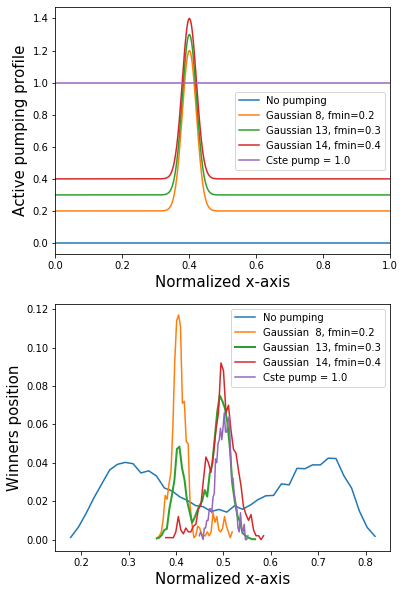

In [17]:
bins = 40

xpos0, ypos0 = make_hist(wpos0, bins=bins)
xpos1, ypos1 = make_hist(wpos1, bins=bins)
xpos2, ypos2 = make_hist(wpos2, bins=bins)
xpos3, ypos3 = make_hist(wpos3, bins=bins)
xpos4, ypos4 = make_hist(wpos4, bins=bins)
xpos5, ypos5 = make_hist(wpos5, bins=bins)
xpos6, ypos6 = make_hist(wpos6, bins=bins)
xpos7, ypos7 = make_hist(wpos7, bins=bins)
xpos8, ypos8 = make_hist(wpos8, bins=bins)
xpos9, ypos9 = make_hist(wpos9, bins=bins)
xpos10, ypos10 = make_hist(wpos10, bins=bins)
xpos11, ypos11 = make_hist(wpos11, bins=bins)
xpos12, ypos12 = make_hist(wpos12, bins=bins)
xpos13, ypos13 = make_hist(wpos13, bins=bins)
xpos14, ypos14 = make_hist(wpos14, bins=bins)

fig, ax = plt.subplots(2, 1, figsize=(6, 10))
x = np.linspace(0., 1., 501)
amp1, mu1, sigma1, threshold1 = params_1
amp2, mu2, sigma2, threshold2 = params_2
amp3, mu3, sigma3, threshold3 = params_3
amp4, mu4, sigma4, threshold4 = params_4
amp5, mu5, sigma5, threshold5 = params_5
amp6, mu6, sigma6, threshold6 = params_6
amp7, mu7, sigma7, threshold7 = params_7
amp8, mu8, sigma8, threshold8 = params_8
amp9, mu9, sigma9, threshold9 = params_9
amp10, mu10, sigma10, threshold10 = params_10
amp11, mu11, sigma11, threshold11 = params_11
amp12, mu12, sigma12, threshold12 = params_12
amp13, mu13, sigma13, threshold13 = params_13
amp14, mu14, sigma14, threshold14 = params_14

ax[0].set_xlim(0., 1.)
#ax[1].set_xlim(0., 1.)

ax[0].plot(x, np.zeros(len(x)), label = 'No pumping')
ax[1].plot(xpos0, ypos0, label = 'No pumping')

#ax[0].plot(x, gaussian(x, amp1, mu1, sigma1, threshold1), label = 'Gaussian')
#ax[1].plot(xpos1, ypos1, label = 'Gaussian')

#ax[0].plot(x, gaussian(x, amp2, mu2, sigma2, threshold2), label = 'Gaussian 2')
#ax[1].plot(xpos2, ypos2, label = 'Gaussian 2')

#ax[0].plot(x, gaussian(x, amp3, mu3, sigma3, threshold3), label = 'Gaussian 3')
#ax[1].plot(xpos3, ypos3, label = 'Gaussian 3')

#ax[0].plot(x, gaussian(x, amp5, mu5, sigma5, threshold5), label = 'Gaussian 5, fmin=0')
#ax[1].plot(xpos5, ypos5, label = 'Gaussian 5, fmin=0')

#ax[0].plot(x, gaussian(x, amp9, mu9, sigma9, threshold9), label = 'Gaussian 6, fmin=0.1')
#ax[1].plot(xpos9, ypos9, label = 'Gaussian  6, fmin=0.1')

ax[0].plot(x, gaussian(x, amp11, mu11, sigma11, threshold11), label = 'Gaussian 8, fmin=0.2')
ax[1].plot(xpos11, ypos11, label = 'Gaussian  8, fmin=0.2')

ax[0].plot(x, gaussian(x, amp13, mu13, sigma13, threshold13), label = 'Gaussian 13, fmin=0.3')
ax[1].plot(xpos13, ypos13, label = 'Gaussian  13, fmin=0.3', linewidth=2)

ax[0].plot(x, gaussian(x, amp14, mu14, sigma14, threshold14), label = 'Gaussian 14, fmin=0.4')
ax[1].plot(xpos14, ypos14, label = 'Gaussian  14, fmin=0.4')

#ax[0].plot(x, gaussian(x, amp10, mu10, sigma10, threshold10), label = 'Gaussian 7, fmin=0.5')
#ax[1].plot(xpos10, ypos10, label = 'Gaussian  7, fmin=0.5')

#ax[0].plot(x, gaussian(x, amp12, mu12, sigma12, threshold12), label = 'Gaussian 9, fmin=0.7')
#ax[1].plot(xpos12, ypos12, label = 'Gaussian  9, fmin=0.7')

#ax[0].plot(x, gaussian(x, amp4, mu4, sigma4, threshold4), label = 'Gaussian 4, fmin=1')
#ax[1].plot(xpos4, ypos4, label = 'Gaussian 4, fmin=1')

ax[0].plot(x, amp6*np.ones(len(x)), label = 'Cste pump = '+str(amp6))
ax[1].plot(xpos6, ypos6, label = 'Cste pump = '+str(amp6))

#ax[0].plot(x, amp7*np.ones(len(x)), label = 'Cste pump = '+str(amp7))
#ax[1].plot(xpos7, ypos7, label = 'Cste pump = '+str(amp7))

#ax[0].plot(x, amp8*np.ones(len(x)), label = 'Cste pump = '+str(amp8))
#ax[1].plot(xpos8, ypos8, label = 'Cste pump = '+str(amp8))

ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)

ax[0].set_xlabel('Normalized x-axis', fontsize=15)
ax[0].set_ylabel('Active pumping profile', fontsize=15)

ax[1].set_xlabel('Normalized x-axis', fontsize=15)
ax[1].set_ylabel('Winners position', fontsize=15)

plt.show()
